In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import fft
from scipy import fftpack
import scipy.io as sio
from PIL import Image
from scipy import stats

In [2]:
def signal_func(t):
    if t < 20:
        return 0
    elif t <= 30:
        return 1
    return 0
def kernel_func(t):
    if t < 1:
        return 0
    elif t < 2:
        return 2 - t
    elif t < 7:
        return (7 - t) / 5
    return 0

# سوال ۴)
## محاسبه کانولوشن در حوزه فرکانسی)
### الف)

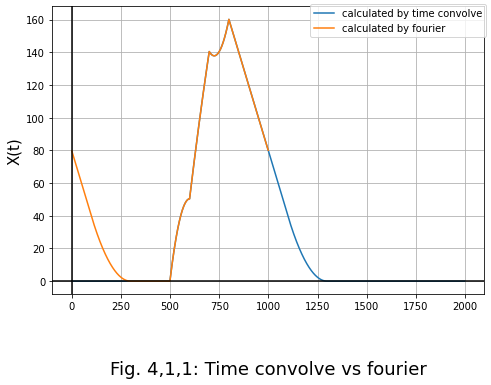

In [3]:
t_signal = np.linspace(0, 50, 1000)
t_kernel = np.linspace(0, 10, 1000)

signal = [signal_func(t_i) for t_i in t_signal]
kernel = [kernel_func(t_i)for t_i in t_kernel]

time_convolve = np.convolve(signal, kernel, mode = 'full')

signal_fourier = fft.fft(signal)
kernel_fourier = fft.fft(kernel)

product = signal_fourier * kernel_fourier
ans = fft.ifft(product)

fig = plt.figure()
ax = fig.add_axes([0, .3, 1, 1])

ax.plot(time_convolve, label = 'calculated by time convolve')
ax.plot(np.real(ans), label = 'calculated by fourier')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

ax.set_ylabel("X(t)", fontsize = 15)

fig.legend(loc = "upper right")

fig.supxlabel("Fig. 4,1,1: Time convolve vs fourier", fontsize = 18)
plt.savefig('D_Figs/Fig. 4,1,1.png', dpi=300, bbox_inches='tight')

## فیلتر کردن سیگنال در یک بعد)

In [4]:
matdata = sio.loadmat('braindata.mat')
timevec = matdata['timevec'][0]
braindata = matdata['braindata'][0]

### الف)
#### ۱)

In [5]:
freq_data = np.fft.fft(braindata)

#### 2)

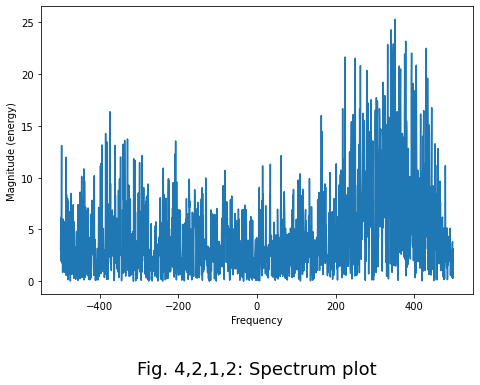

In [6]:
fig = plt.figure()
ax = fig.add_axes([0, .3, 1, 1])
ax.magnitude_spectrum(freq_data, Fs = 1000)
fig.supxlabel("Fig. 4,2,1,2: Spectrum plot", fontsize = 18)
plt.savefig('D_Figs/Fig. 4,2,1,2.png', dpi=300, bbox_inches='tight')

#### 3)

In [7]:
f1 = 10
f2 = 250
tmp = np.fft.rfft(braindata)

#### 4)

In [8]:
fourier1 = freq_data
fourier2 = freq_data

#### 5,6)

In [9]:
filtered1 = [np.exp(- (i - f1)**2) * freq_data[i] for i in range(len(freq_data))]
filtered2 = [np.exp(- (i - f2)**2) * freq_data[i] for i in range(len(freq_data))]

#### 7)

/home/c/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/c/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


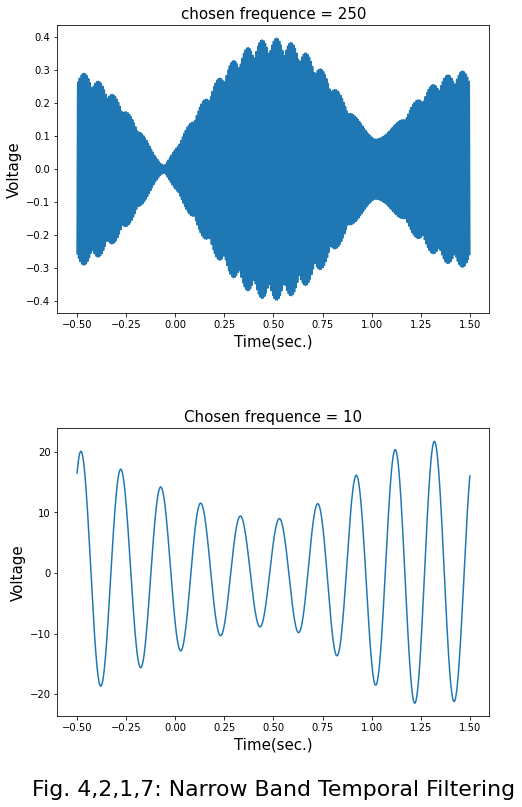

In [10]:
reconstructed1 = fft.ifft(filtered1)
reconstructed2 = fft.ifft(filtered2)

fig = plt.figure()
ax1 = fig.add_axes([0, .3, 1, 1])
ax2 = fig.add_axes([0, 1.7, 1, 1])

ax1.set_xlabel('Time(sec.)', fontsize = 15)
ax2.set_xlabel('Time(sec.)', fontsize = 15)

ax1.set_ylabel('Voltage', fontsize = 15)
ax2.set_ylabel('Voltage', fontsize = 15)

ax1.set_title('Chosen frequence = 10', fontsize = 15)
ax2.set_title('chosen frequence = 250', fontsize = 15)

ax1.plot(timevec, reconstructed1)
ax2.plot(timevec, reconstructed2)

fig.supxlabel("Fig. 4,2,1,7: Narrow Band Temporal Filtering", fontsize = 22)
plt.savefig('D_Figs/Fig. 4,2,1,7,.png', dpi=300, bbox_inches='tight')

### ب)
طبق نمودار

spectrum

فرکانس های نزدیک به ۲۵۰ بسیار بیشتر از فرکانس های نزدیک به ۱۰ است پس انتظار داریم اگر فرکانس های نزدیک به ۱0 را فیلتر کنیم یک موج نسبتا متناوب داشته باشم که داریم.
و اگر فرکانس های نزدیک به ۲۵۰ را فیلتر کنیم نمودار پیجیده تری داشته‌باشیم.

## فیلتر کردن عکس در دو بعد
### Low Pass Filtering
#### الف)
ابعاد: ۵۱۲ *‌۵۱۲

(512, 512)


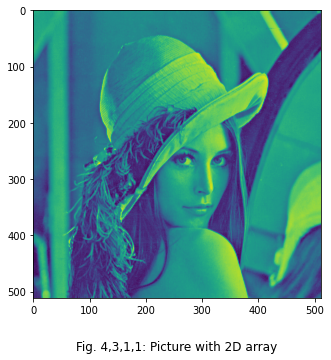

In [35]:
lenna = np.asarray(Image.open("Lenna.png"))
pic = np.ones([512, 512])

for i in range(512):
    for j in range(512):
        pic[i][j] = sum(lenna[i][j]) // 3

print(pic.shape)

fig = plt.figure()
ax = fig.add_axes([0, 0.2, 1, 1])

ax.imshow(pic)
fig.supxlabel("Fig. 4,3,1,1: Picture with 2D array")
fig.savefig('D_Figs/Fig. 4,3,1,1.png', dpi=300, bbox_inches='tight')

#### ب)
##### 2,3)

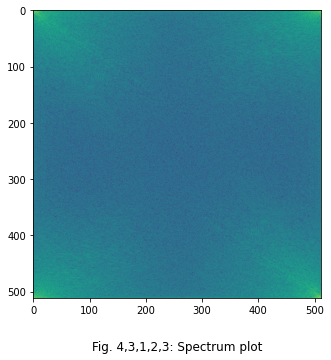

In [36]:
four = np.fft.fft2(pic)
spec = np.abs(four)

fig = plt.figure()
ax = fig.add_axes([0, 0.2, 1, 1])

ax.imshow(np.log(spec))
fig.supxlabel("Fig. 4,3,1,2,3: Spectrum plot")
fig.savefig('D_Figs/Fig. 4,3,1,2,3.png', dpi=300, bbox_inches='tight')

##### 4)

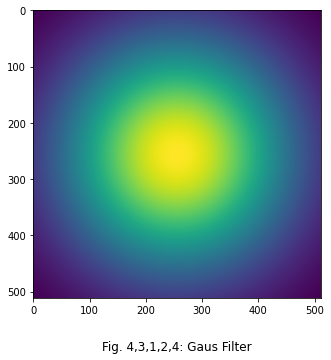

In [13]:
width = .99
lims = np.shape(pic) 

xr = stats.zscore(np.arange(lims[0]))
[x, y] = np.meshgrid(xr, xr)
gaus2d = np.exp( -(x ** 2 + y ** 2) / (2*width**2))

fig = plt.figure()
ax = fig.add_axes([0, 0.2, 1, 1])

ax.imshow(gaus2d)
fig.supxlabel("Fig. 4,3,1,2,4: Gaus Filter")
fig.savefig('D_Figs/Fig. 4,3,1,2,4.png', dpi=300, bbox_inches='tight')

##### 5)

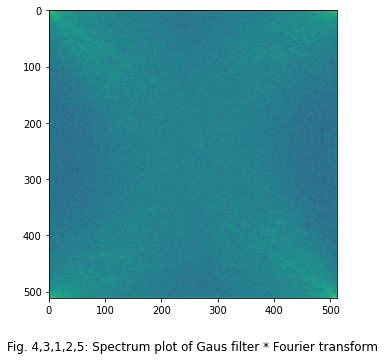

In [14]:
res = gaus2d * four

fig = plt.figure()
ax = fig.add_axes([0, 0.2, 1, 1])
res_spec = np.log(np.abs(res))

ax.imshow(res_spec)
fig.supxlabel("Fig. 4,3,1,2,5: Spectrum plot of Gaus filter * Fourier transform")
fig.savefig('D_Figs/Fig. 4,3,1,2,5.png', dpi=300, bbox_inches='tight')

##### 6)

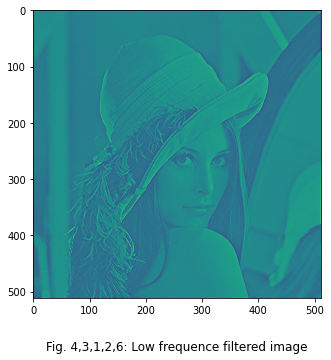

In [15]:
fig = plt.figure()
ax = fig.add_axes([0, 0.2, 1, 1])

final_pic = np.fft.ifft2(res)
ax.imshow(np.real(final_pic))
fig.supxlabel("Fig. 4,3,1,2,6: Low frequence filtered image")
fig.savefig('D_Figs/Fig. 4,3,1,2,6.png', dpi=300, bbox_inches='tight')

### High Pass Filtering
### الف)

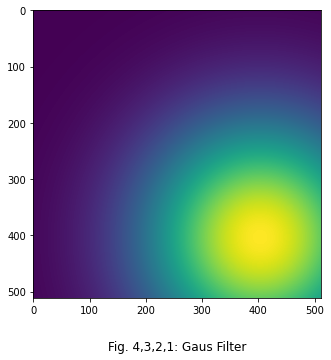

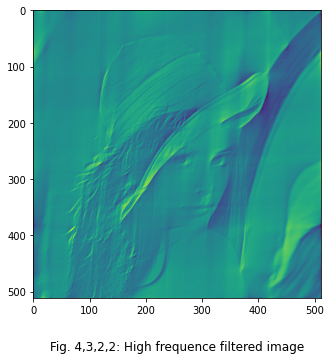

In [16]:
width = .99
lims = np.shape(pic) 

xr = stats.zscore(np.arange(lims[0]))
[x, y] = np.meshgrid(xr, xr)
gaus2d = np.exp( -((1 - x) ** 2 + (1 - y) ** 2) / (2*width**2))

fig = plt.figure()
ax = fig.add_axes([0, 0.2, 1, 1])

ax.imshow(gaus2d)
fig.supxlabel("Fig. 4,3,2,1: Gaus Filter")
fig.savefig('D_Figs/Fig. 4,3,2,1.png', dpi=300, bbox_inches='tight')

fig = plt.figure()
ax = fig.add_axes([0, 0.2, 1, 1])
res = gaus2d * four
final_pic = np.fft.ifft2(res)
ax.imshow(np.real(final_pic))
fig.supxlabel("Fig. 4,3,2,2: High frequence filtered image")
fig.savefig('D_Figs/Fig. 4,3,2,2.png', dpi=300, bbox_inches='tight')

### ب)
در عکس دوم بیشتر خط های جدا کننده ی اجزای صورت به چشم می‌آیند زیرا فرکانس در این نقاط تصاویر بالا است.